# Outcomes and Random Variables

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

fb = pd.read_csv('data/facebook.csv')
ms = pd.read_csv('data/microsoft.csv')

## Rolling dice in Python

In [3]:
die = pd.DataFrame([1,2,3,4,5,6])

# Calculate the sum of these two dice
sum_of_dice = die.sample(2, replace=True).sum().loc[0]
print('Sum of dice is ', sum_of_dice)

Sum of dice is  8


## Rolling dice in Python - 50 times
X: The sum of faces (**random variable**)

In [4]:
trial = 50
results = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)]
results[:10] # Get the first 10 results

[9, 5, 6, 7, 5, 9, 7, 3, 10, 7]

The output is the realized or observed outcomes of values of X

# Frequency and Distributions

# Frequency

In [5]:
freq = pd.DataFrame(results)[0].value_counts() # Count values
sort_freq = freq.sort_index() # Sort index
sort_freq

0
2     5
3     1
4     5
5     7
6     8
7     5
8     7
9     4
10    5
11    2
12    1
Name: count, dtype: int64

The output is in the form of:

[Possible outcomes]    [Frequency]

<Axes: xlabel='0'>

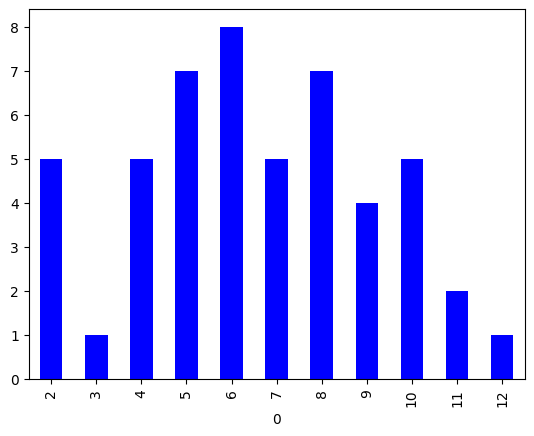

In [6]:
# Plot the frequencies
sort_freq.plot(kind='bar', color='blue')

## Relative frequency
Relative frequency = frequency / number of trials

<Axes: xlabel='0'>

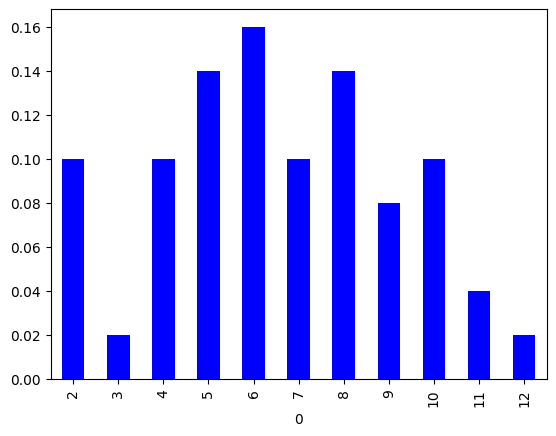

In [7]:
relative_freq = sort_freq/trial
relative_freq.plot(kind='bar', color='blue')

Let us try to increase the number of trials to 10000, and see what will happen...

<Axes: title={'center': '10000 trials'}, xlabel='0'>

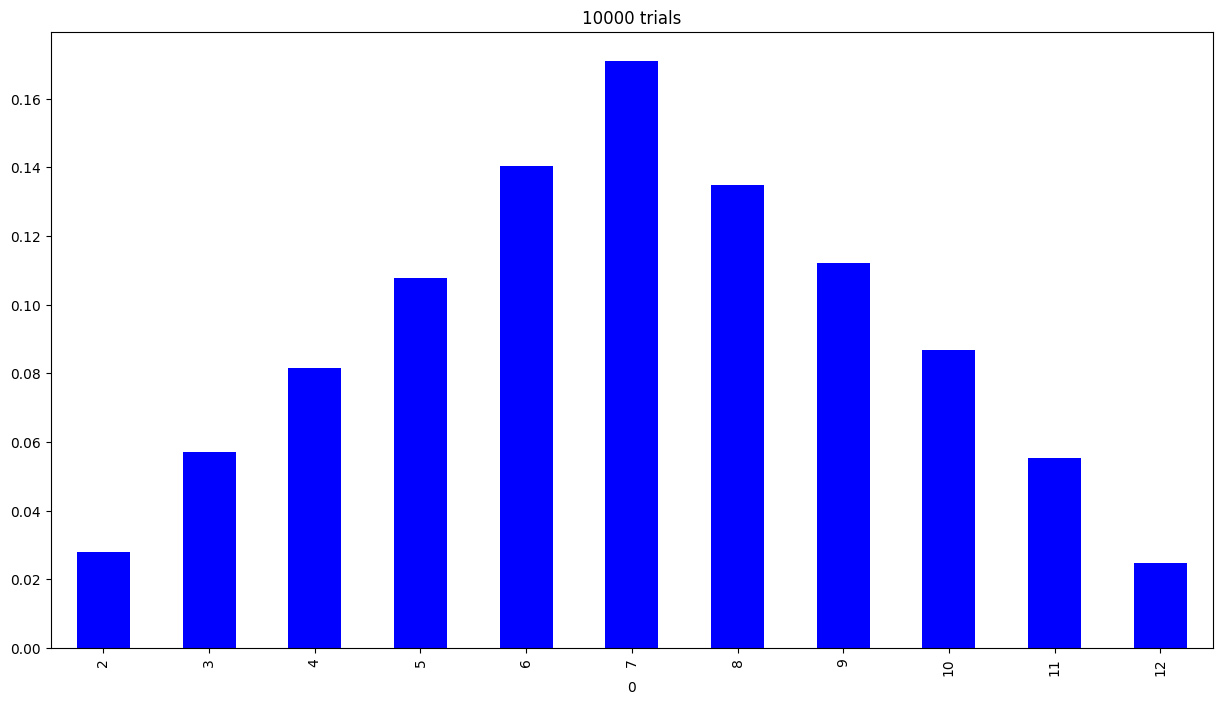

In [8]:
trial = 10000
results = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)]
freq = pd.DataFrame(results)[0].value_counts()
sort_freq = freq.sort_index()
relative_freq = sort_freq/trial
relative_freq.plot(kind='bar', color='blue', figsize=(15, 8), title='10000 trials')

We can see that with more trials, the result looks more and more stable, and this is very close to a probability distribution. 

Infinite number of trials? → Limit: distribution of sum of face X

## Distribution table

In [9]:
X_distri = pd.DataFrame(index=[2,3,4,5,6,7,8,9,10,11,12])
X_distri['Prob'] = [1,2,3,4,5,6,5,4,3,2,1]
X_distri['Prob'] = X_distri['Prob'] / 36
X_distri

,Prob
2,0.027778
3,0.055556
4,0.083333
5,0.111111
6,0.138889
7,0.166667
8,0.138889
9,0.111111
10,0.083333
11,0.055556


## Mean and variance of a distribution
$$\text{Mean (or expectation)}=\sum_i{p_ix_i}$$

$$\text{Variance}=\sum_ i{(x_ i-\text{Mean})}^2p_ i$$

**Mean**: the average of all outcomes weighted by probabilities

**Variance**: describes the variation of outcome

In [10]:
Mean = (X_distri.index * X_distri['Prob']).sum()
Var = (((X_distri.index - Mean)**2) * X_distri['Prob']).sum()
print(Mean, Var)

6.999999999999998 5.833333333333333


## Continuous Random Variable
How to calculate the probability of stock return?
What is the distribution of continous random variables?
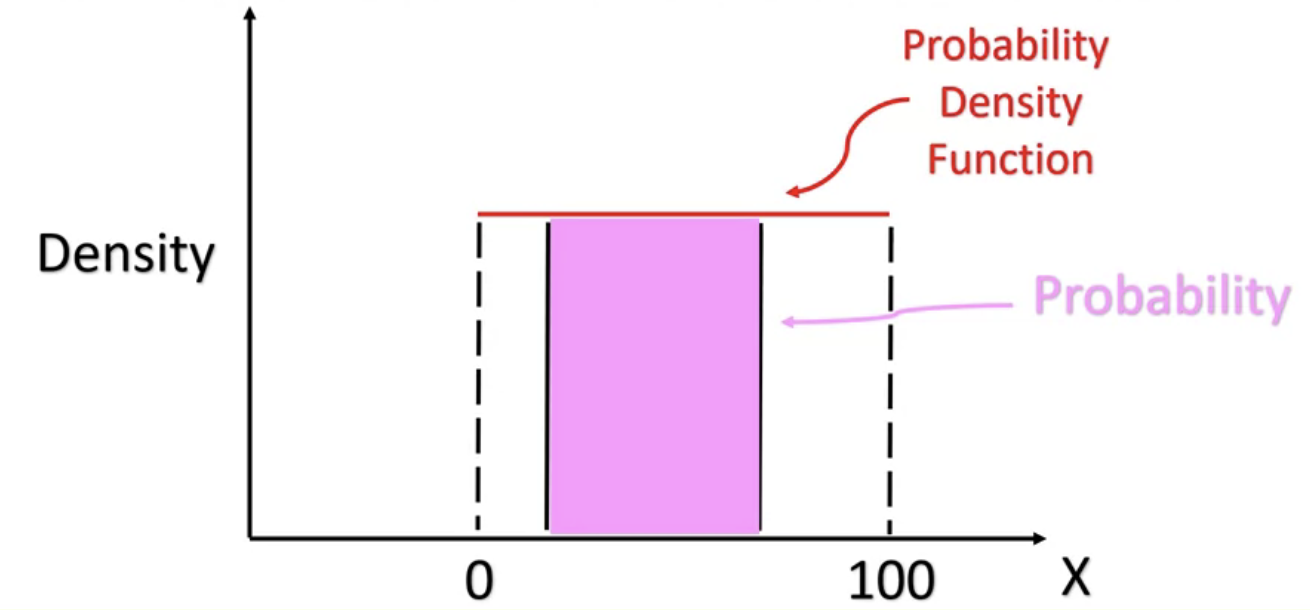

Uniform random distribution, which takes on zero and 100 with equal chance.

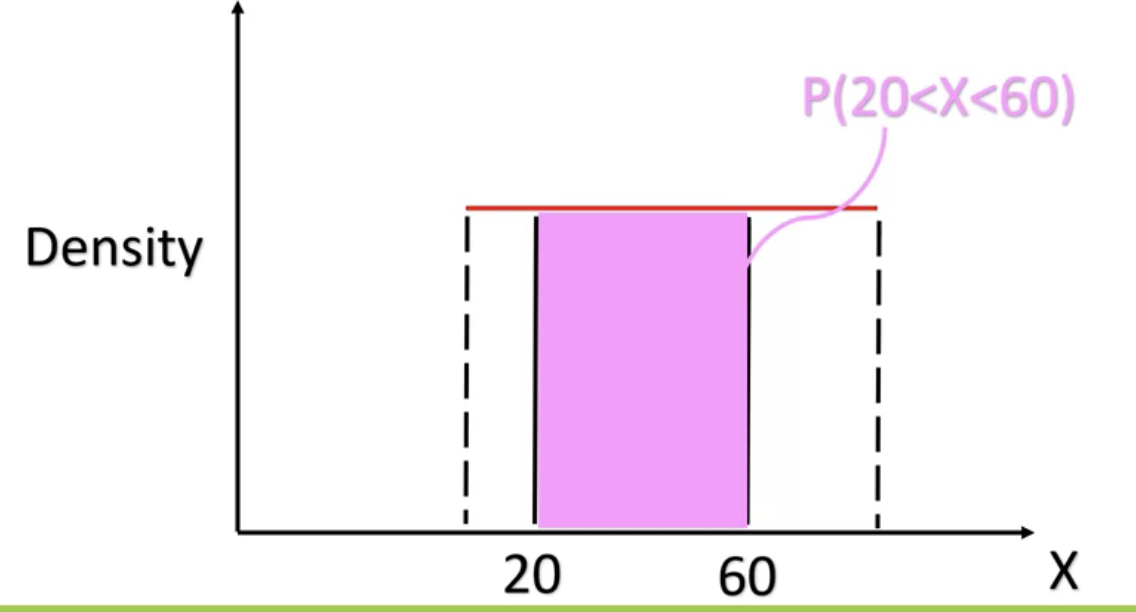


# Models of Distribution

## Big drop in Apple's Stock Price

<Axes: >

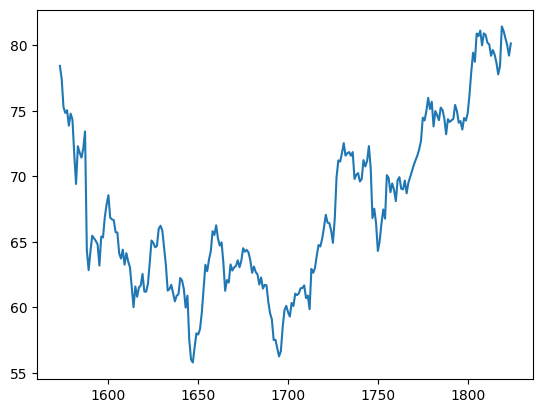

In [11]:
aapl = pd.read_csv("data/apple.csv")
aapl.loc[(aapl['Date'] >= '2012-8-01') & (aapl['Date'] <= '2013-8-01')]['Close'].plot()

The stock price of Apple dropped over 40% from August 2012 to May 2013, roughly one year.

We need to compute the probability that the yearly return can be less than -40%.

## Log daily return of Apple

<Axes: >

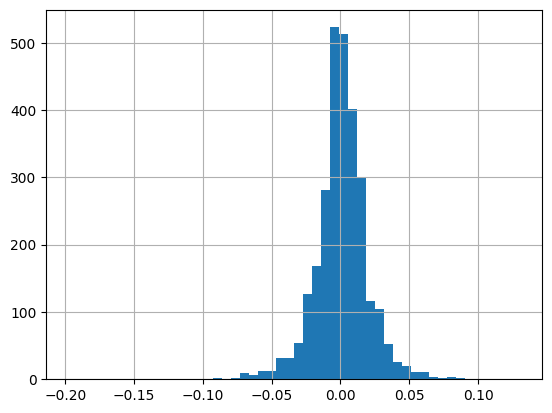

In [12]:
aapl['LogReturn'] = np.log(aapl['Close']).shift(-1) - np.log(aapl['Close'])
aapl['LogReturn'].hist(bins=50)

This distribution is approximately normal.

Using scipy (a scientific computation package of Python) we can get probability density function (PDF) and cumulative distribution function (CDF)

In [13]:
from scipy.stats import norm

density = pd.DataFrame()
# Normal random variable can take values from negative to positive infinity
# We use -4 and 4 for simplicity
density['x'] = np.arange(-4, 4, 0.001)
# 0, 1 gives the mean and standard deviation of a normal random variable
density['pdf'] = norm.pdf(density['x'], 0, 1) # Get PDF
density['cdf'] = norm.cdf(density['x'], 0, 1) # Get CDF

### PDF

Normal density, symmetric with a mean and symmetric center

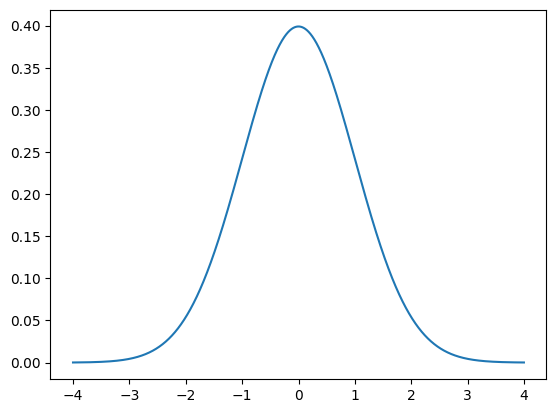

In [14]:
plt.plot(density['x'], density['pdf'])

### CDF

The cumulative probability will approach 1.

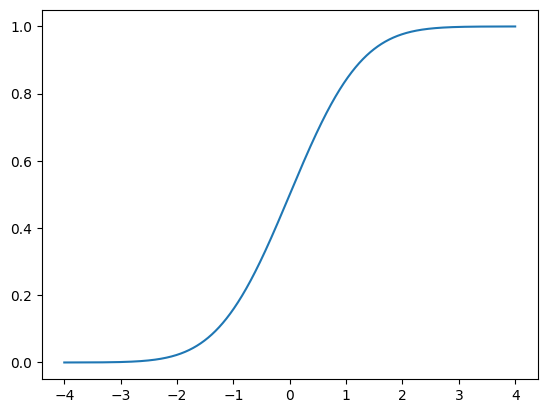

In [15]:
plt.plot(density['x'], density['cdf'])

We can model daily stock return using normal distribution.

## Approximate mean and variance of the log daily return
We can model daily stock return using normal distribution.

We do not know the real mean and standard deviation of this normal random variable.

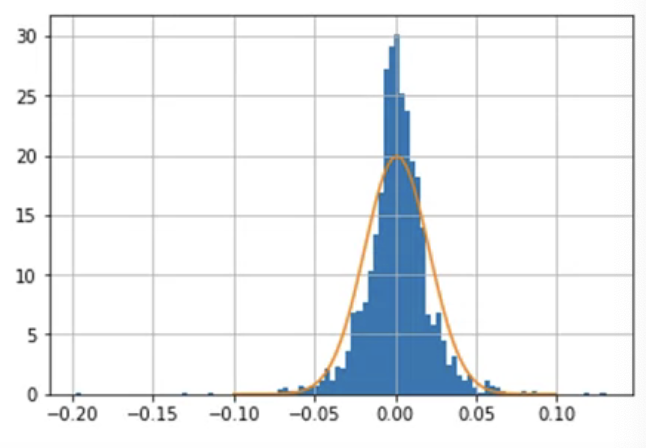

We have a large collection of data return from historic data. We can compute the mean and standard deviation in this collection. 

In [16]:
mu = aapl['LogReturn'].mean()
sigma = aapl['LogReturn'].std(ddof=1)
print(mu, sigma)

0.000975467759150088 0.020045447615854962


They are not the same as those of a normal variable, but close enough.

## What is the chance of losing over 5% in a day?

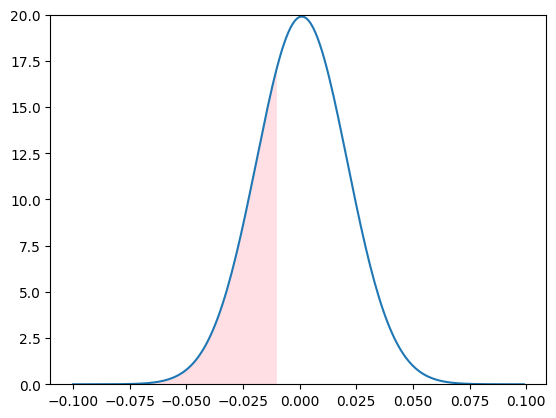

In [17]:
# Create DataFrame for normal distribution
denApp = pd.DataFrame()
denApp['x'] = np.arange(-0.1, 0.1, 0.001)
denApp['pdf'] = norm.pdf(denApp['x'], mu, sigma) # mu - mean, sigma - standard deviation

# Plot the PDF
plt.ylim(0, 20)
plt.plot(denApp['x'], denApp['pdf'])

# Correct the range and step size of x and y1 to match
x_fill = np.arange(-0.1, -0.01, 0.001)
y1_fill = norm.pdf(x_fill, mu, sigma)

# Fill the area under the curve
plt.fill_between(x=x_fill, y1=y1_fill, y2=0, facecolor='pink', alpha=0.5)

This pink area is the probability of losing more than 5% in one day.

We can use CDF to get this probability:

In [18]:
prob_return1 = norm.cdf(-0.05, mu, sigma)
print('The probability is ', prob_return1)

The probability is  0.005495344250959507


Hence, we have a 0.5% chance to have a daily loss of more than 5%

## What is the probability of dropping over 40% in 1 year (220 trading days)?

Recall AAPL price drop of 40% from August 2012 to May 2013

P(Drop over 40% in 220 days)

We will use another normal distribution to model yearly return. 
- We need to figre out the mean and the standard deviation of a yearly return. 
- We make assumption that the daily returns are independent (which is quite wrong, but simplifies the discussion) 

## Sum of independent normal random variables
**Mean**: $$\mu_{x_1+x_2+x_3+...+x_n}=\mu_{x_1}+\mu_{x_2}+\mu_{x_3}+...+\mu_{x_n}$$

**Variance**: $$\sigma^2_{x_1+x_2+x_3+...+x_n}=\sigma^2_{x_1}+\sigma^2_{x_2}+\sigma^2_{x_3}+...+\sigma^2_{x_n}$$

In [19]:
mu220 = 220 * mu
sigma220 = 220**0.5 * sigma
print(mu220, sigma220)

print('The probability of dropping over 40% in 220 days is ', norm.cdf(-0.4, mu220, sigma220))

0.21460290701301937 0.29732203656371786
The probability of dropping over 40% in 220 days is  0.01936101545414263


There's only less than 2% chance to have yearly loss to be more than 40%.

## Value at Risk (VaR)

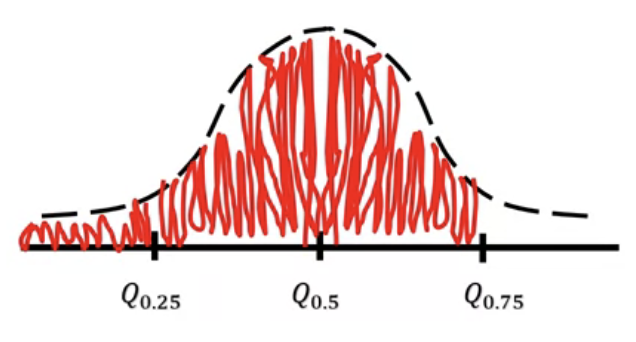

Finding quantiles of a normal distribution is a common task when performing statistical test in the financial risk management.

Normal distribution quantiles can be obtained using `norm.ppf`. ppf stands for **percent point function**. 

Using quantile in finance, there is an important 
**risk measure value of risk, or VaR**. It estimates how much a set of investments might lose with a given probability. VaR is typically used by firms and regulators in the financial industry to gauge the amount of assets needed to cover possible loss. 

For example, 5% of quantile of daily return is called a 95% VaR, or VaR at the level of 95%

We can use a ppf to get a 5% of quantile

In [20]:
norm.ppf(0.05, mu, sigma)

-0.031996359455654697

In other words, there is a 5% chance that the daily return is worse than -3%.

## Is it safe to use Normal Distribution?

*"Distributions of daily and monthly stock returns are rather symmetric about their means, but the tails are fatter (i.e., there are more outliers) than would be expected with normal distributions."* - Fama and French

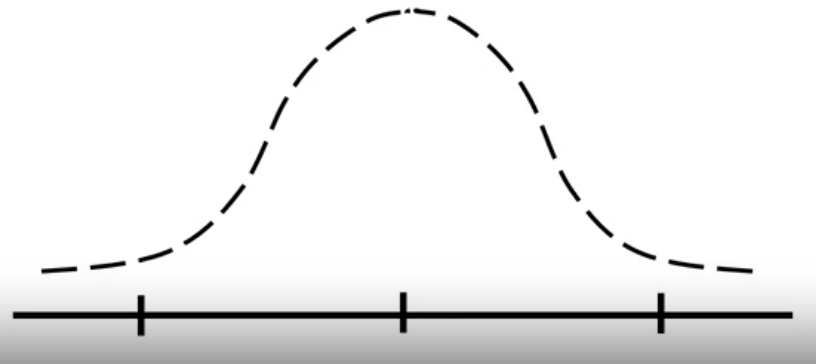

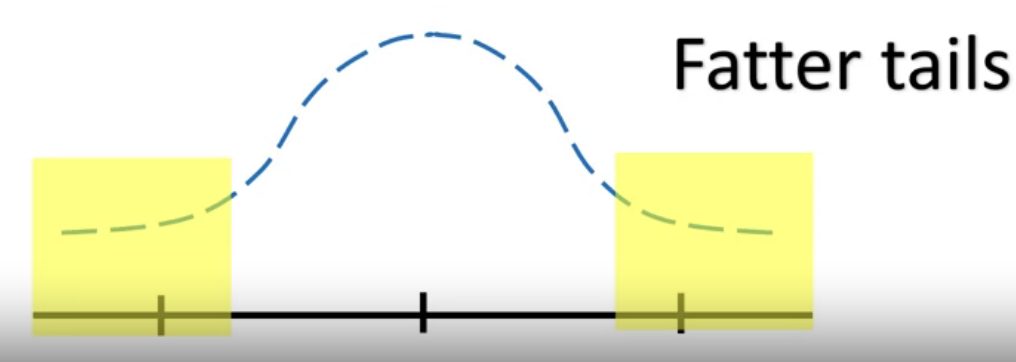
